---
title: "Homework-5"
author: "Brian Kwon"
format: 
    html: 
        embed-resources: true
---

# Problems 

## Problem-1

Problem 5.10 \#12 in Chihara/Hesterberg. 

The data set FishMercury contains mercury levels (parts per million) for 30 fish caught in lakes in Minnesota.



In [2]:
mer = read.csv("FishMercury.csv")
head(mer)

,Mercury
,<dbl>
1,1.870
2,0.160
3,0.088
4,0.160
5,0.145
6,0.099


(a) Create a histogram or box-plot of the data. What do you observe?



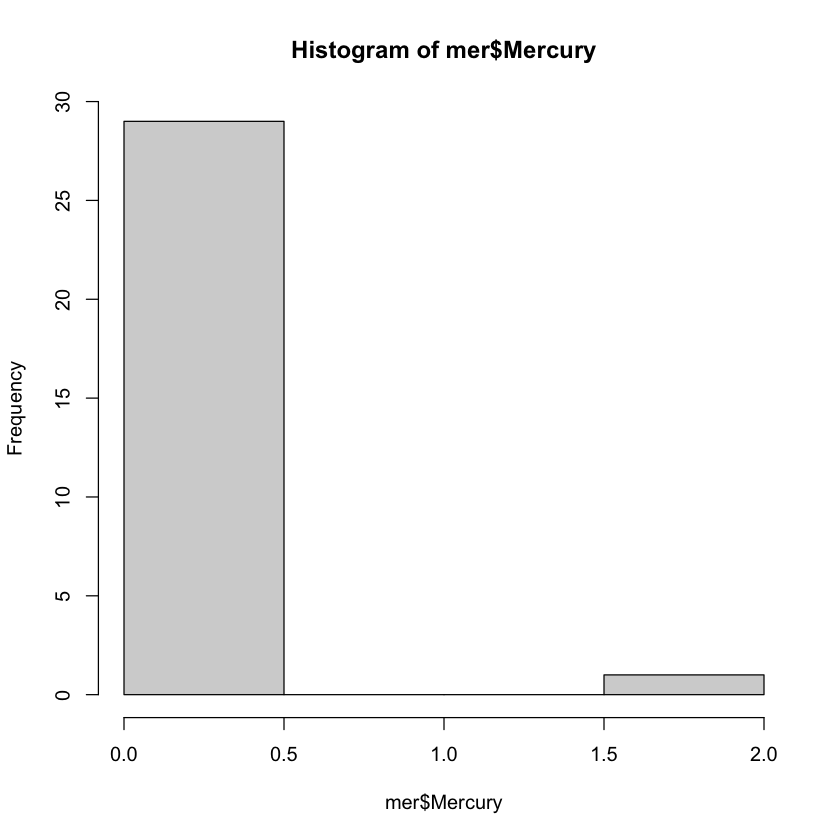

In [3]:
hist(mer$Mercury)

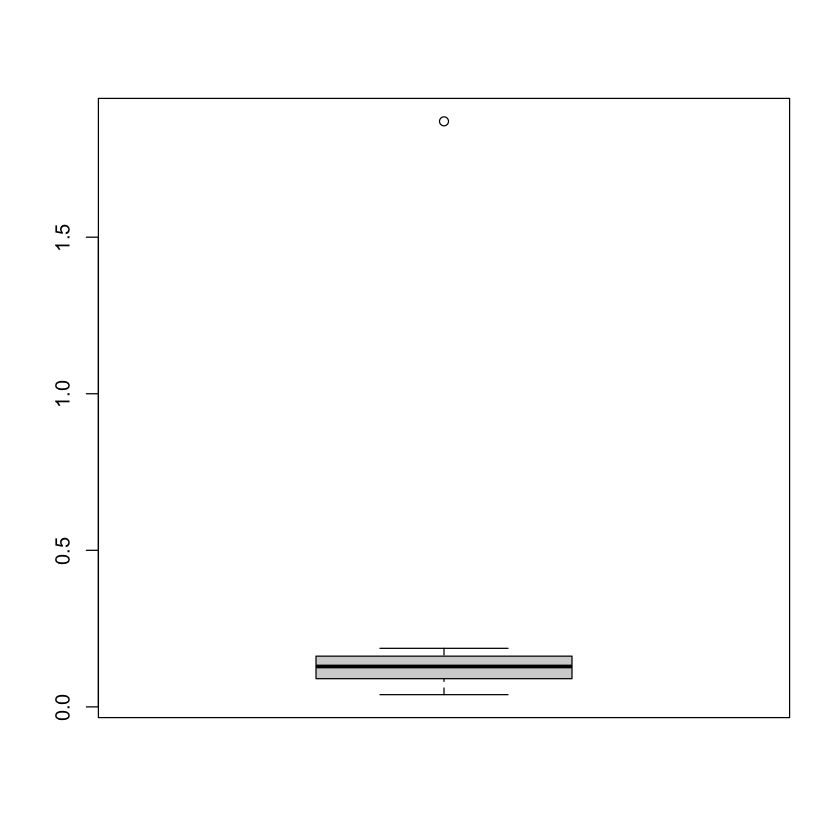

In [4]:
boxplot(mer$Mercury)

There are some outliers.

(b) Find the Bootstrap sampling mean and record the bootstrap standard error and the $95\%$ bootstrap percentile interval.



In [5]:
boot.mer = replicate(10000, mean(sample(mer$Mercury, length(mer$Mercury), replace = TRUE)))
cat("Bootstrap mean:",mean(boot.mer),"\n")
cat("Bootstrap standard error:",sd(boot.mer),"\n")
cat("95% percentile interval:",quantile(boot.mer, c(0.025, 0.975)))

Bootstrap mean: 0.1810922 
Bootstrap standard error: 0.05727322 
95% percentile interval: 0.1123325 0.3064667

(c) Remove the outlier and find bootstrap sampling mean of the remaining data. Record the bootstrap standard error and the $95\%$ bootstrap percentile interval. Comment on your results.



In [6]:
z_scores = (mer$Mercury - mean(mer$Mercury)) / sd(mer$Mercury)
threshold = 3
cleaned_data = mer$Mercury[abs(z_scores) < threshold]

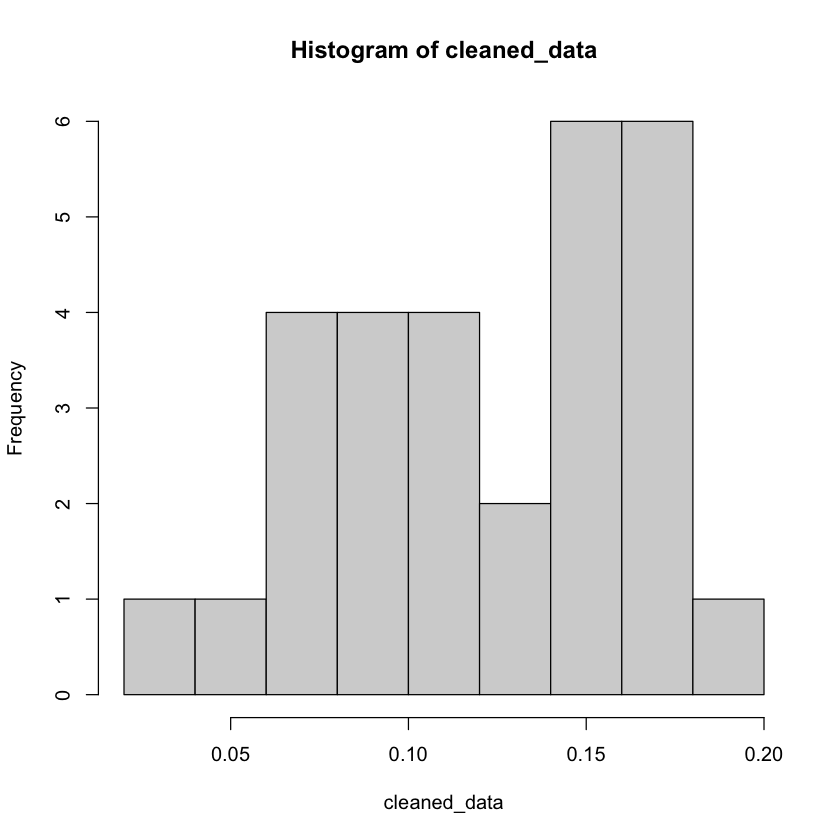

In [7]:
hist(cleaned_data)

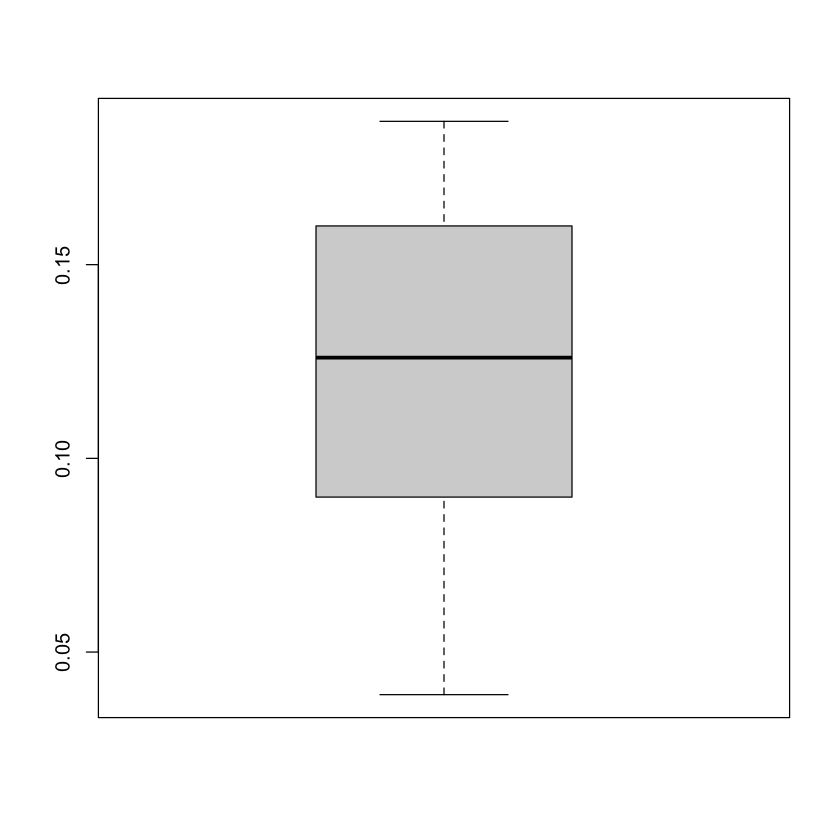

In [8]:
boxplot(cleaned_data)

In [9]:
boot.mer = replicate(10000, mean(sample(cleaned_data, length(cleaned_data), replace = TRUE)))
cat("Cleaned bootstrap mean:",mean(boot.mer),"\n")
cat("Cleaned bootstrap standard error:",sd(boot.mer),"\n")
cat("Cleaned 95% percentile interval:",quantile(boot.mer, c(0.025, 0.975)))

Cleaned bootstrap mean: 0.1235945 
Cleaned bootstrap standard error: 0.007856023 
Cleaned 95% percentile interval: 0.1078276 0.1389319

(d) What effect did removing the outlier have on the bootstrap distribution, in particular, the standard error?



The confidence interval is narrowed. The standard error is decreased. The bootstrap mean is decreased.

## Problem-2 

Problem 3.9 \#12abc in Chihara/Hesterberg. 

Two students went to a local supermarket and collected data on cereals; they classified cereals by their target consumer (children versus adults) and the placement of the cereal on the shelf (bottom, middle, and top). The data are given in _Cereals_.



In [11]:
cer = read.csv("Cereals.csv")
head(cer)

,ID,Age,Shelf,Sodiumgram,Proteingram
,<int>,<chr>,<chr>,<dbl>,<dbl>
1,1,adult,bottom,0.007000000,0.10000000
2,2,children,bottom,0.006666667,0.06666667
3,3,children,bottom,0.004666667,0.03333333
4,4,children,bottom,0.006969697,0.03030303
5,5,adult,bottom,0.007000000,0.10000000
6,6,children,bottom,0.006000000,0.03333333


(a) Create a table (Two-way) to summarize the relationship between age of target consumer and shelf location.

In [12]:
c.table = table(cer$Age,cer$Shelf)
c.table

          
           bottom middle top
  adult         2      1  14
  children      7     18   1

(b) Conduct a chi-square test using R’s chisq.test() command. Write your null and alternative hypthesis. What is your conclusion based on the results of your test?



$H_0:$ The shelf location is independet on age.\
$H_A:$ The shelf location is not independet on age.

In [13]:
c.test = chisq.test(c.table)
c.test

Warning message in chisq.test(c.table):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  c.table
X-squared = 28.625, df = 2, p-value = 6.083e-07


Having less than 0.05 pvalue, we reject the null hypothesis saying that there is a statistically significant dependecy between shelf location and age.

(c) R returns a warning message. Compute the expected counts for each cell to see why.

<!-- (d) (self-learn question) Use a Fisher's Exact Test. What is your conclusion?. (We use a Fisher's Exact Test when the sample sizes are small and the expected cell counts are less than 5 : Example to refer:<https://statsandr.com/blog/fisher-s-exact-test-in-r-independence-test-for-a-small-sample/>).   -->

<!-- (e) Compare your results  of part (b),(d),(f). Explain/Compare in few sentences where/when/what situations should we use Yate's Continuity correction and Fisher's exact test. -->

<!-- (d) Use a Yate's continuity correction and do the test again. What is your conclusion? -->



In [15]:
c.test$expected

,bottom,middle,top
adult,3.55814,7.511628,5.930233
children,5.44186,11.488372,9.069767


Some expected values are much off from the sample value.

## Problem-3

This problem is similar to what we have done in the lab using the spotify data. Please use the "Artists.csv" data set.

Data Science Question: Does the average "liveness" is larger for Beyoncé than that of Taylor Swift?

Liveness: This value describes the probability that the song was recorded with a live audience. According to the official documentation “a value above 0.8 provides strong likelihood that the track is live”.



In [14]:
art = read.csv("Artists.csv")
ts = art[art$artist_name == "Taylor Swift",]
be = art[art$artist_name == "Beyonc\303\251",]
head(ts)
head(be)

,X,artist_name,Valence,danceability,energy,loudness,speechiness,acousticness,liveness,tempo,track_name,album_name,album_release_year
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,1,Taylor Swift,0.328,0.594,0.713,-5.314,0.0503,0.000328,0.1140,129.958,State Of Grace (Taylor's Version),Red (Taylor's Version),2021
2,2,Taylor Swift,0.408,0.516,0.777,-4.908,0.0375,0.001080,0.0761,125.047,Red (Taylor's Version),Red (Taylor's Version),2021
3,3,Taylor Swift,0.299,0.645,0.593,-6.506,0.0288,0.034400,0.1300,109.984,Treacherous (Taylor's Version),Red (Taylor's Version),2021
4,4,Taylor Swift,0.767,0.584,0.557,-6.371,0.0342,0.012900,0.0576,154.008,I Knew You Were Trouble (Taylor's Version),Red (Taylor's Version),2021
5,5,Taylor Swift,0.132,0.440,0.528,-7.809,0.0317,0.017100,0.2340,185.972,All Too Well (Taylor's Version),Red (Taylor's Version),2021
6,6,Taylor Swift,0.642,0.642,0.695,-5.620,0.0281,0.000443,0.0753,103.984,22 (Taylor's Version),Red (Taylor's Version),2021


,X,artist_name,Valence,danceability,energy,loudness,speechiness,acousticness,liveness,tempo,track_name,album_name,album_release_year
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
1370,1370,Beyonc,0.181,0.509,0.360,-8.200,0.0361,0.6330,0.1300,129.624,BIGGER,The Lion King: The Gift [Deluxe Edition],2020
1371,1371,Beyonc,0.623,0.783,0.693,-6.747,0.1740,0.1970,0.0768,119.063,FIND YOUR WAY BACK,The Lion King: The Gift [Deluxe Edition],2020
1372,1372,Beyonc,0.563,0.926,0.782,-5.300,0.1010,0.0194,0.3550,120.005,DON'T JEALOUS ME,The Lion King: The Gift [Deluxe Edition],2020
1373,1373,Beyonc,0.867,0.795,0.671,-5.792,0.0601,0.0488,0.0752,92.001,JA ARA E,The Lion King: The Gift [Deluxe Edition],2020
1374,1374,Beyonc,0.348,0.554,0.450,-9.454,0.1820,0.7310,0.3390,87.047,NILE,The Lion King: The Gift [Deluxe Edition],2020
1375,1375,Beyonc,0.718,0.611,0.723,-6.199,0.3690,0.1200,0.3220,105.758,MOOD 4 EVA (feat. Oumou Sangar),The Lion King: The Gift [Deluxe Edition],2020


a. Perform meaningful EDA (Exploratory Data Analysis) using some Data Visualizations (relevant to this data science question).



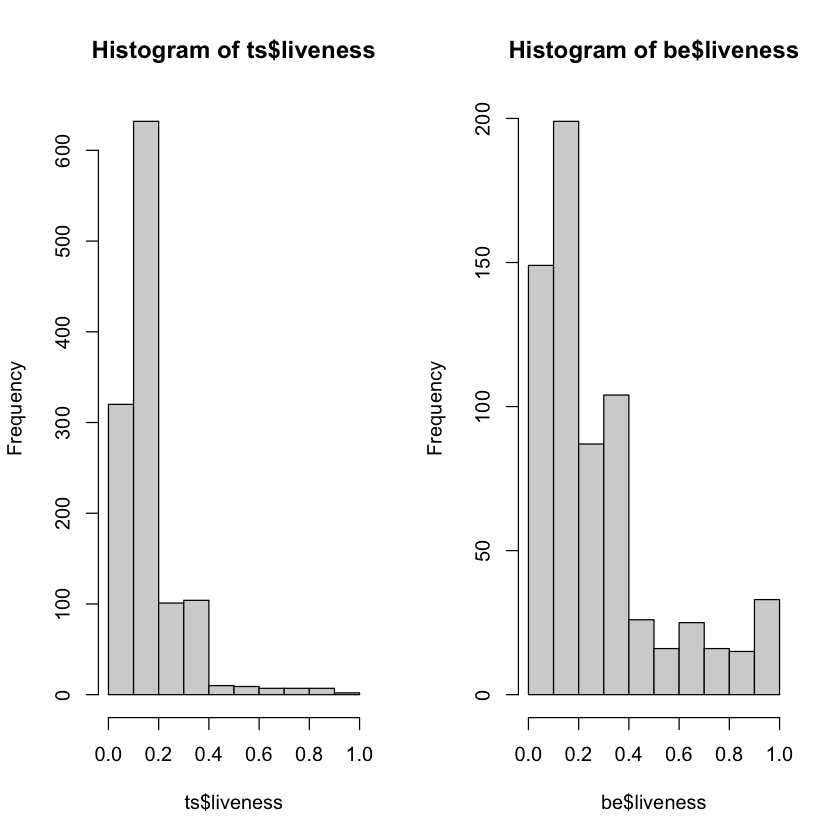

In [15]:
par(mfrow = c(1, 2))
hist(ts$liveness)
hist(be$liveness)

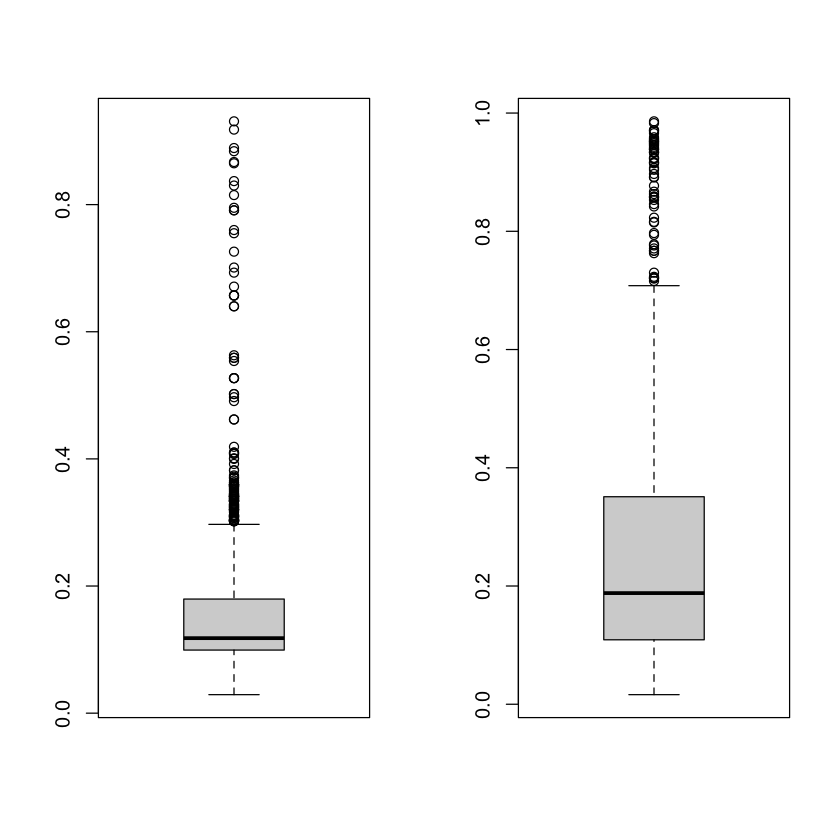

In [17]:
par(mfrow = c(1, 2))
boxplot(ts$liveness)
boxplot(be$liveness)

b. Write the null and alternative hypothesis for this test.



$H_0$: The average "liveness" for Beyonce and Taylor Swift is same.\
\
$H_A$: The average "liveness" for Beyonce is larger than Taylor Swift's "liveness".

c. Perform a t-test and state your results and non-technical conclusion.



In [18]:
t.test(be$speechiness, ts$speechiness, alt="greater")


	Welch Two Sample t-test

data:  be$speechiness and ts$speechiness
t = 6.5893, df = 1814.4, p-value = 2.886e-11
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.04542722        Inf
sample estimates:
mean of x mean of y 
0.1749979 0.1144484 


d. What can you say about the confidence interval? (Interpret)



Since the 95% confidence interval goes from 0.045 to infinity, we can be certain that Beyonce has higher liveness than Taylor Swift

e. Perform a bootstrap test for ratio of means of "liveness", Find the 95% bootstrap percentile interval for the ratio of means and write your conclusion. 



In [20]:
iter = 10000
boot_ts = numeric(length(ts$liveness))
boot_be = numeric(length(be$liveness))
for(i in 1:iter){
    boot_ts[i] = mean(sample(ts$liveness,length(ts$liveness),replace=TRUE))
    boot_be[i] = mean(sample(be$liveness,length(be$liveness),replace=TRUE))
}
quantile(boot_be/boot_ts,c(0.025,0.975))

2.5%    97.5% 
1.600556 1.869501

As the 95% bootstrap percentile interval for the ratio of means groes from 1.6 to 1.87, not including 1, we can conclude that Beyonce has higher liveness than Taylor Swift.

f. What is the bootstrap estimate of the bias for the mean ratio?



In [21]:
mean(boot_be/boot_ts) - mean(be$liveness)/mean(ts$liveness)

[1] 0.0008910921

g. Compare your results from part c) and part e).



Both results (c) and (e) are same.

## Problem-4

Write an R function that computes the t-formula confidence interval in (7.8) from sample mean, sample standard deviation, sample size, and confidence level, and use it to do exercise 7.6 #6 in Chihara/Hesterberg.

Q: Julie is interested in the sugar content of vanilla ice cream. She obtains a random sample of $n = 20$ brands and finds an average of $18.05 g$ with standard deviation $5 g$ (per half cup serving). Assuming that the data come from a normal distribution, find a $90\%$ confidence interval for the mean amount of sugar in a half cup serving of vanilla ice cream.



In [27]:
t_CI = function(s_mean,s_sd,s_n,level){
    lb = s_mean - (qt(1-(1-level)/2,s_n-1) * (s_sd/sqrt(s_n)))
    ub = s_mean + (qt(1-(1-level)/2,s_n-1) * (s_sd/sqrt(s_n)))
    return(c(lb,ub))
}

In [28]:
t_CI(18.05,5,20,0.90)

[1] 16.11677 19.98323

# Bonus Problems: 

THE FOLLOWING IS AN OPTIONAL (NOT MANDATORY) BONUS ASSIGNMENT

FOR UP TO +12 BONUS POINTS

## Ex. Problem-0

_Distribution A is a standard normal distribution and distribution B is a $N(1, 2^2)$ distribution. Generate 20 random numbers from distribution A and 30 random numbers form distribution B and  record these in a suitable data frame._

Examine the  null hypothesis that the means of A and B are the same against the alternative that the mean of B is larger, using a permutation test. Report the p-value and state your conclusion.

## Ex. Problem-1  

Exercise 7.6 #12 in Chihara/Hasterberg.

Q: Consider the data set _Girls2004_ (see Case Study in Section 1.2).

(a) Create exploratory plots and compare the distribution of weights between babies born to nonsmokers and babies born to smokers.

(b) Find a $95\%$ one-sided lower t confidence bound for the mean difference in weights between babies born to nonsmokers and smokers. Give a sentence interpreting the interval.

(c) What is your conclusion?

## Ex. Problem-2  

Exercise 6.4 #1 in Chihara/Hesterberg.

Let X be a binomial random variable, $X \sim Binom(n, p)$. Show that the MLE of $p$ is $\hat{p}  = X/n$.

## Ex. Problem-3

Exercise 6.4 #14 in Chihara/Hesterberg. 

Let the five numbers 2, 3, 5, 9, 10 come from the uniform distribution on $[\alpha, \beta]$. Find the method of moments estimates of $\alpha$ and $\beta$.
